#Lectura de datos

1.- Se necesita obtener todos los conjuntos necesarios para implementar el clasificador

In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

setInicial=pd.read_csv('Vinos.csv')

#Dividir el conjunto en datos y clase
inicialDatos=setInicial.drop('quality', axis=1)
#inicialClase=setInicial.pop('quality') #clase
inicialClase=setInicial['quality'] #clase

entrenamientoDatos, evaluacionDatos,entrenamientoClase,evaluacionClase=\
train_test_split(inicialDatos, inicialClase,test_size=0.3, stratify=inicialClase)

nombresAtributos=entrenamientoDatos.columns.values
print("Atributos: ", nombresAtributos,"\n")

print("Datos de entrenamiento:", entrenamientoClase.value_counts())
print("\nDatos de evaluacion:", evaluacionClase.value_counts())

clase_objetivo='Cat_5'
clases=['Cat_5','Cat_7']

Atributos:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'] 

Datos de entrenamiento: quality
Cat_5    477
Cat_7    139
Name: count, dtype: int64

Datos de evaluacion: quality
Cat_5    204
Cat_7     60
Name: count, dtype: int64


#Clasificadores
##SVM
`SVC`:


In [2]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import classification_report

################## Clasificador ######################
clasificadorSVM = SVC(kernel='linear')
#kernel:‘linear’, ‘poly’,‘sigmoid’,‘precomputed’ default: ‘rbf’

################## Modelo ###########################
modeloSVM = clasificadorSVM.fit(entrenamientoDatos, entrenamientoClase)
predictSVM=modeloSVM.predict(evaluacionDatos)
predictSVMTrain=modeloSVM.predict(entrenamientoDatos)

print("Vectores de soporte:\n")
print(clasificadorSVM.support_vectors_)

print("Número de vectores por clase: ",clasificadorSVM.n_support_)

reporte=classification_report(evaluacionClase,predictSVM,labels=clases)#output_dict=True)
print(reporte)

Vectores de soporte:

[[11.5    0.41   0.52  ...  3.26   0.88  11.   ]
 [ 6.1    0.715  0.1   ...  3.57   0.5   11.9  ]
 [ 6.9    0.58   0.2   ...  3.38   0.49  11.7  ]
 ...
 [11.6    0.41   0.54  ...  3.02   0.76   9.9  ]
 [ 8.9    0.48   0.53  ...  3.21   0.59  12.1  ]
 [10.     0.44   0.49  ...  3.23   0.63  11.6  ]]
Número de vectores por clase:  [90 88]
              precision    recall  f1-score   support

       Cat_5       0.94      0.94      0.94       204
       Cat_7       0.78      0.78      0.78        60

    accuracy                           0.90       264
   macro avg       0.86      0.86      0.86       264
weighted avg       0.90      0.90      0.90       264



## Ramdom forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree



##Arbol

              precision    recall  f1-score   support

       Cat_5       0.94      0.94      0.94       204
       Cat_7       0.79      0.80      0.79        60

    accuracy                           0.91       264
   macro avg       0.86      0.87      0.87       264
weighted avg       0.91      0.91      0.91       264



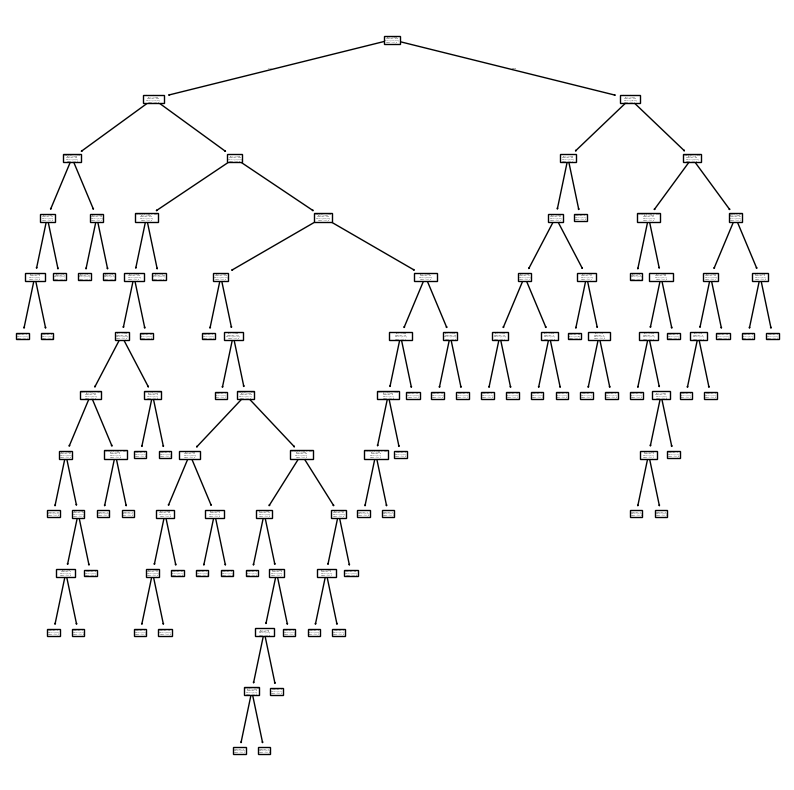

In [5]:
from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificadorArbol = DecisionTreeClassifier()

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(entrenamientoDatos, entrenamientoClase)
predictArbol=modeloArbol.predict(evaluacionDatos)


reporte=classification_report(evaluacionClase,predictArbol,labels=clases)#output_dict=True)
print(reporte)

plt.figure(figsize=(10,10))
tree.plot_tree(clasificadorArbol,feature_names=nombresAtributos,class_names=clases)
plt.show()

##K-nn

In [7]:
from sklearn.neighbors import KNeighborsClassifier #permite utilizar el clasificador K-nn

#1. Datos del modelo
clasificadorKnn=KNeighborsClassifier(n_neighbors=5) #Por defecto distancia euclideana y k=5


################## Modelo ###########################
modeloKnn = clasificadorKnn.fit(entrenamientoDatos, entrenamientoClase)
predictKnn=modeloKnn.predict(evaluacionDatos)


reporte=classification_report(evaluacionClase,predictKnn,labels=clases)#output_dict=True)
print(reporte)


              precision    recall  f1-score   support

       Cat_5       0.86      0.94      0.89       204
       Cat_7       0.68      0.47      0.55        60

    accuracy                           0.83       264
   macro avg       0.77      0.70      0.72       264
weighted avg       0.82      0.83      0.82       264



##Sistema de voto

In [8]:
from sklearn.ensemble import VotingClassifier


#ROC

In [10]:
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import RocCurveDisplay

################## Clasificador ######################
clasificadorArbol = DecisionTreeClassifier()

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(entrenamientoDatos, entrenamientoClase)
predictArbol=modeloArbol.predict(evaluacionDatos)

reporte=classification_report(evaluacionClase,predictArbol,labels=clases)#output_dict=True)
print(reporte)


predictionProbArbol = modeloArbol.predict_proba(evaluacionDatos)#Retorna la probabilidad de que la instancia pertenezca a una clase

print(roc_auc_score(evaluacionClase, predictionProbArbol[:,1]))
print(roc_auc_score(evaluacionClase, predictionProbArbol[:,0]))



              precision    recall  f1-score   support

       Cat_5       0.95      0.94      0.94       204
       Cat_7       0.79      0.82      0.80        60

    accuracy                           0.91       264
   macro avg       0.87      0.88      0.87       264
weighted avg       0.91      0.91      0.91       264

0.8764705882352941
0.12352941176470589


In [11]:
%%shell
jupyter nbconvert --to html 4_2_5_SVMRandom

UsageError: Cell magic `%%shell` not found.
